# COGS 108 - Final Project 

# Overview

As a group, we wanted to dig deeper into whether or not there was any association between income inequality and the level of crime experienced in different cities in the United States. As we explored our data and applied tests to said data, we saw that there was indeed a difference in crime rates between areas that did versus did not experience income inequality. However, upon further testing, we saw that the correlation between income inequality and crime was quite weak, making income inequality a weak predictor for crime index.

# Names

- Jaclyn Chin
- Elisa Lau
- Samuel Parker
- Elise Wong
- Fiona Wong

###### Group Members IDs

- A14579160
- A12764321
- A13665511
- A13026941
- A13779845

# Research Question

We want to shed light on the effects of economic inequality on society, and see if it has any effect on crime rates. We can tackle this topic from a data science perspective by narrowing down the question a bit more. The data science question we are asking is the following:  What is the correlation between street crime and economic inequality in the US? 
    
There are some important things to note about how we defined our terms. Firstly, the kind of crime we are looking at includes forms of violent crime and street crime - things like muggings, theft, and perhaps even murder. We are not currently interested in things like speeding or white collar crime.

Secondly, we are looking at economic inequality, not poverty. While it is fairly obvious that poverty and crime are related (with desperation comes drastic measures), we are trying to tease out the effect of income inequality in and of itself. It could be that inequality contributes to the disintegration of communities and crime in a fashion that is independent from the sheer effect of poverty.  Perhaps one community might have more crime in it than another even though they both have similar levels of poverty, due to the fact that the one community has a substantial level of inequality. Indeed, it’s possible that an unequally distributed increase in wealth could catalyze an upswing in crime. This will no doubt require close inspection to properly disambiguate the effects of poverty from the effects of inequality.

## Background and Prior Work

Due to developments in our current political climate, discussion about the harms of income inequality has become increasingly prevalent. Popular politicians such as Alexandria Ocasio-Cortez and Bernie Sanders have shined the floodlights on the glaring cleft that lies between the richest Americans and the rest of us.  A quick look at the numbers will show that the divide between rich and poor is growing in this country (1). With the advent of this apparent fact, many have begun researching the various ways in which increased income inequality affects society. 

We’re not the first group of people  to investigate the relationship between crime and income inequality. According to David Luther from Zippia, in 2016, the FBI released crime rate statistics that showed correlation between city crime and income inequality (2). The study looks at FBI data about property crime and violent crime and concluded that income inequality correlates the strongest with crime compared to other variables such as unemployment, poverty, and number of high school graduates where there was only weak correlation. In this paper, the results also show that robbery and burglary in the US are strongly affected by income inequality (3). On a larger scale, this journal article also describes how violent crime and income inequality are positively correlated when looking at different countries (4).

We can add something of value to the larger conversation by getting a better idea of exactly what kinds of crime interact with economic inequality. Rather than look at an aggregate of property and violent crimes, we want to look at the specific types of crimes that might correlate with income inequality in the United States. Types of crime we are interested in investigating include assault, robbery, arson, rape, and hate crimes. In terms of income inequality, we can also look at the different types of ways that income inequality is measured to give more context to our findings. For instance, looking at the mean, median, and standard deviation of income for each location and taking into account the state Gini index (discussed more in the Data section below).

References (include links):
- 1) U.S. Income Inequality: Facts, Causes, Solutions: https://www.thebalance.com/income-inequality-in-america-3306190
- 2) New FBI Data Correlates City Crime to Income Inequality: https://www.zippia.com/advice/crime-income-inequality/
- 3) Income inequality and crime in the United States: https://www.researchgate.net/publication/23648005_Income_inequality_and_crime_in_the_United_States
- 4) Inequality and Violent Crime: https://www.jstor.org/stable/10.1086/338347?seq=1#page_scan_tab_contents

# Hypothesis


We expect to find a positive correlation between the rate of street crime and economic inequality in the US. There are news articles all over the internet that speculate about this particular correlation. It is a relationship that governments, organizations, economists, and sociologists have all studied a fair amount. In particular, as stated in the NYU Dispatch’s article “How big is income inequality as a determinant of crime rates?” from May 23, 2018, “[a] 2002 study by The World Bank found that crime rates and inequality are positively correlated, and an increase in income inequality has the effect of intensely increasing crime rates.”

# Dataset(s)

# instructions
*Fill in your dataset information here*

(Copy this information for each dataset)
- Dataset Name:
- Link to the dataset:
- Number of observations:

1-2 sentences describing each dataset. 

If you plan to use multiple datasets, add 1-2 sentences about how you plan to combine these datasets.

### Household Income Dataset

# SAM'S DATASCRAPING

### US Crime Dataset
- Dataset Name: UScrime_scraped.csv
- Link to the dataset: http://www.city-data.com/crime/index.html
- Number of observations: 9865

The data on US city crime was web scraped from City-Data which uses data from public records and agencies. Data for 9865 cities was scraped and 19 features for each city were collected (city, state, murders, rapes, burglarys, assaults, crime index, and more). There are total numbers of crimes committed per city, crimes per 100,000 population, and a crime index which is a value that gives more weight to certain crimes (for instance murder is weighted more heavliy than assault).

### Web Scraping for US Crime Data

In [ ]:
# Create empty arrays to fill with data
city = []
state = []
murders = []
murdersper = []
rapes = []
rapesper = []
robberies = []
robberiesper = []
assaults = []
assaultsper = []
burglaries = []
burglariesper = []
thefts = []
theftsper = []
auto_thefts = []
auto_theftsper = []
arsons = []
arsonsper = []
crime_index = []

# Array for city links while scraping each state
links = []

# No crime data for Hawaii
# States with only one link
states = ['Alaska', 'Alabama', 'Arkansas', 'Arizona', 'Colorado', 'Connecticut', 'Delaware', 'Iowa', 'Idaho',
          'Indiana', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts',  'Minnesota', 
          'Mississippi',  'Montana', 'Nebraska', 'Nevada', 'New-Hampshire',  'New-Mexico', 'North-Carolina', 
          'North-Dakota',  'Oklahoma', 'Oregon','Rhode-Island', 'South-Carolina', 'South-Dakota', 'Tennessee',
          'Utah','Vermont', 'Virginia', 'Washington', 'West-Virginia', 'Wyoming']

# States with multiple links
multstates = ['California', 'California2','Florida' , 'Florida2','Georgia', 'Georgia2', 'Illinois','Illinois2', 
              'Illinois3', 'Illinois4' , 'Michigan', 'Michigan2', 'Missouri', 'Missouri2','New-Jersey', 
              'New-Jersey2', 'New-York', 'New-York2','Ohio', 'Ohio2', 'Pennsylvania','Pennsylvania2', 
              'Pennsylvania3', 'Texas','Texas2', 'Texas3', 'Wisconsin', 'Wisconsin2']

# Loop through all of the states (this was done in two parts with states and multstates)
for currstate in multstates:
    # Make a get request
    response = rq.get('http://www.city-data.com/crime/crime-' + currstate + '.html', proxies=proxies)

    # Get the html for the state page
    page_html = bsoup(response.text, 'html.parser')

    # Get the names for all of the cities and put them into a list
    lstcities = page_html.find(id = 'content')
    list(lstcities.children)
    lstref = list(lstcities.children)[7]
    list(lstref.children)

    # Create list with all html links for each city
    for link in lstref.find_all('a'):
        links.append(link.get('href'))

for citylink in links:
    # Make a get request
    cityresponse = rq.get('http://www.city-data.com/crime/' + citylink, proxies=proxies)
    # Sleep for a random time between loops so website does not get spammed
    time.sleep(random.randint(8,15))
    
    # Get the html for the city and find the crime data we want (types of crime, crime per 100k people, crime index)
    crimesoup = bsoup(cityresponse.text, 'html.parser')
    crimehtml = list(crimesoup.children)[2]
    crimebody = list(crimehtml.children)[3]
    crimeol = list(crimebody.children)[9] 
    crimeli = list(crimeol.children)[9]

    # Get city and state name
    citystate = crimeli.get_text()
    citystate = citystate.split(',')
    citya = citystate[0]
    currcity = citya.replace('Crime rate in ', '')
    city.append(currcity)
    statea = citystate[1]
    stateb = statea.split('(')
    state.append(stateb[0].strip())
    
    # Find the crime table
    table = crimesoup.find(id="crimeTab")
    b = list(table.children)[5]
    
    # Find murder numbers
    murd = list(b.children)[1]
    c = 0
    for i in list(murd.children):
        c = c+1
    murdnum = list(murd.children)[c-1]

    # Find numbers for total murders in 2017 and murders per 100,000 people
    d = 0
    for j in list(murdnum.children):
        d = d+1
    if (d == 1):
        murders.append(float('NaN'))
        murdersper.append(float('NaN'))
    else:
        murdtotal = int(list(murdnum.children)[0].replace(',', ''))
        murdper = list(list(murdnum.children)[2])[0]
        murdper = murdper[1:]
        murdper = float(murdper[:-1].replace(',', ''))
        murders.append(murdtotal)
        murdersper.append(murdper)

    # Get rape numbers
    ra = list(b.children)[3]
    ranum = list(ra.children)[c-1]
    d = 0
    for j in list(ranum.children):
        d = d+1
    if (d == 1):
        rapes.append(float('NaN'))
        rapesper.append(float('NaN'))
    else:
        # Get numbers for total rapes in 2017 and rapes per 100,000 people
        ratotal = int(list(ranum.children)[0].replace(',', ''))
        raper = list(list(ranum.children)[2])[0]
        raper = raper[1:]
        raper = float(raper[:-1].replace(',', ''))
        rapes.append(ratotal)
        rapesper.append(raper)
    
    # Get robbery numbers
    rob = list(b.children)[5]
    robnum = list(rob.children)[c-1]
    
    d = 0
    for j in list(robnum.children):
        d = d+1
    if (d == 1):
        robberies.append(float('NaN'))
        robberiesper.append(float('NaN'))
    else:
        # Get numbers for total robberies in 2017 and robberies per 100,000 people
        robtotal = int(list(robnum.children)[0].replace(',', ''))
        robper = list(list(robnum.children)[2])[0]
        robper = robper[1:]
        robper = float(robper[:-1].replace(',', ''))
        robberies.append(robtotal)
        robberiesper.append(robper)
        
    # Get assault numbers
    assau = list(b.children)[7]
    assaunum = list(assau.children)[c-1]
    d = 0
    for j in list(assaunum.children):
        d = d+1
    if (d == 1):
        assaults.append(float('NaN'))
        assaultsper.append(float('NaN'))
    else:
        # Get numbers for total assaults in 2017 and assaults per 100,000 people
        assautotal = int(list(assaunum.children)[0].replace(',', ''))
        assauper = list(list(assaunum.children)[2])[0]
        assauper = assauper[1:]
        assauper = float(assauper[:-1].replace(',', ''))
        assaults.append(assautotal)
        assaultsper.append(assauper)
    
    # Get burlgary numbers
    bur = list(b.children)[9]
    burgnum = list(bur.children)[c-1]
    d = 0
    for j in list(burgnum.children):
        d = d+1
    if (d == 1):
        burglaries.append(float('NaN'))
        burglariesper.append(float('NaN'))
    else:
        # Get numbers for total burglaries in 2017 and burglaries per 100,000 people
        burgtotal = int(list(burgnum.children)[0].replace(',', ''))
        burgper = list(list(burgnum.children)[2])[0]
        burgper = burgper[1:]
        burgper = float(burgper[:-1].replace(',', ''))
        burglaries.append(burgtotal)
        burglariesper.append(burgper)
        
    # Get theft numbers
    thef = list(b.children)[11]
    theftnum = list(thef.children)[c-1]
    d = 0
    for j in list(theftnum.children):
        d = d+1
    if (d == 1):
        thefts.append(float('NaN'))
        theftsper.append(float('NaN'))
    else:
        # Get numbers for total thefts in 2017 and thefts per 100,000 people
        thefttotal = int(list(theftnum.children)[0].replace(',', ''))
        theftper = list(list(theftnum.children)[2])[0]
        theftper = theftper[1:]
        theftper = float(theftper[:-1].replace(',', ''))
        thefts.append(thefttotal)
        theftsper.append(theftper)
        
    # Get auto theft numbers
    authef = list(b.children)[13]
    autotheftnum = list(authef.children)[c-1]
    d = 0
    for j in list(autotheftnum.children):
        d = d+1
    if (d == 1):
        auto_thefts.append(float('NaN'))
        auto_theftsper.append(float('NaN'))
    else:
        # Get numbers for total auto thefts in 2017 and auto thefts per 100,000 people
        autothefttotal = int(list(autotheftnum.children)[0].replace(',', ''))
        autotheftper = list(list(autotheftnum.children)[2])[0]
        autotheftper = autotheftper[1:]
        autotheftper = float(autotheftper[:-1].replace(',', ''))
        auto_thefts.append(autothefttotal)
        auto_theftsper.append(autotheftper)
    
    # Get arson numbers
    ar = list(b.children)[15]
    arsonnum = list(ar.children)[c-1]
    d = 0
    for j in list(arsonnum.children):
        d = d+1
    if (d == 1):
        arsons.append(float('NaN'))
        arsonsper.append(float('NaN'))
    else:
        # Get numbers for total arsons in 2017 and arsons per 100,000 people
        arsontotal = int(list(arsonnum.children)[0].replace(',', ''))
        arsonper = list(list(arsonnum.children)[2])[0]
        arsonper = arsonper[1:]
        arsonper = float(arsonper[:-1].replace(',', ''))
        arsons.append(arsontotal)
        arsonsper.append(arsonper)
    
    # Get crime index numbers
    cind = list(b.children)[17]
    cindnum = list(cind.children)[0]
    d = 0
    for j in list(cindnum.children):
        d = d+1
    crate = list(cindnum.children)[d-1]
    crimeind = float(list(crate.children)[0])
    crime_index.append(crimeind)

# Create a dataframe with all of the crime data collected
crime = pd.DataFrame({
        'city': city,
        'state': state,
        'murders': murders,
        'murdersper100k': murdersper,
        'rapes': rapes,
        'rapesper100k': rapesper,
        'robberies': robberies,
        'robberiesper100k': robberiesper,
        'assaults': assaults,
        'assaultsper100k': assaultsper,
        'burglaries': burglaries,
        'burglariesper100k': burglariesper,
        'thefts': thefts,
        'theftsper100k': theftsper,
        'autothefts': auto_thefts,
        'autotheftsper100k': auto_theftsper,
        'arson': arsons,
        'arsonper100k': arsonsper,
        'crime index': crime_index
    })
crime

# Export the crime dataframe as a csv file
crime.to_csv('crime_scrapingmultstates4.csv')

### Gini Index Dataset

- Dataset Name: city_gini_index.csv
- Link to the dataset: https://factfinder.census.gov/faces/tableservices/jsf/pages/productview.xhtml?pid=ACS_17_5YR_B19083&prodType=table
- Number of observations: 3573

The Gini Index Dataset was downloaded from American Fact Finder which allows users to search for datasets colleted by the United States Census Bureau. The data is from the 2017 American Community Survey and it has 3573 cities with their ID, location, estimated Gini Index, and margin of error. The Gini Index dataset is used as supplementary data to the household income dataset.

We plan to combine the crime and household datasets by merging them based on city and state values. The Gini Index dataset will also be combined with the crime dataset based on city and state.

# Setup

In [1]:
# Import libraries
import time
import random
from bs4 import BeautifulSoup as bsoup
import requests as rq
import re
import sys
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import patsy
import statsmodels.api as sm
import scipy.stats as stats
from scipy.stats import ttest_ind, chisquare, normaltest
from sklearn import preprocessing

# Don't display too many rows/cols of DataFrames
pd.options.display.max_rows = 7
pd.options.display.max_columns = 10

# Data Cleaning

In [2]:
# Load crime data
df_crime = pd.read_csv('UScrime_scraped.csv')
df_crime

,Unnamed: 0,city,state,murders,murdersper100k,...,autothefts,autotheftsper100k,arson,arsonper100k,crime index
0,0,Abbeville,Alabama,0.0,0.0,...,6.0,231.7,NaN,NaN,265.3
1,1,Adamsville,Alabama,1.0,23.1,...,15.0,346.1,NaN,NaN,468.4
2,2,Addison,Alabama,0.0,0.0,...,2.0,271.0,NaN,NaN,117.9
...,...,...,...,...,...,...,...,...,...,...,...
9862,9862,Torrington,Wyoming,0.0,0.0,...,3.0,44.6,0.0,0.0,91.5
9863,9863,Wheatland,Wyoming,0.0,0.0,...,7.0,194.3,0.0,0.0,117.2
9864,9864,Worland,Wyoming,0.0,0.0,...,3.0,56.7,0.0,0.0,118.4


In [3]:
# Load income data
df_income = pd.read_csv('economic_data.csv')
df_income

,Unnamed: 0,place,percentile,income,percent
0,0,https://statisticalatlas.com/place/Alabama/Ala...,95th,"0 177,359.000000\rdtype: object",0 241.881\rdtype: object
1,1,https://statisticalatlas.com/place/Alabama/Ala...,80th,"0 122,176.000000\rdtype: object",0 166.623\rdtype: object
2,2,https://statisticalatlas.com/place/Alabama/Ala...,60th,"0 85,277.000000\rdtype: object",0 116.300\rdtype: object
...,...,...,...,...,...
10869,3,https://statisticalatlas.com/place/Wyoming/Pow...,Median,"0 46,971.000000\rdtype: object",0 100.000\rdtype: object
10870,4,https://statisticalatlas.com/place/Wyoming/Pow...,40th,"0 40,583.000000\rdtype: object",0 86.400\rdtype: object
10871,5,https://statisticalatlas.com/place/Wyoming/Pow...,20th,"0 23,336.000000\rdtype: object",0 49.682\rdtype: object


After loading the crime data and the income data, it was necessary for us to extract the city and state within the url in the place column of our income df.

In [4]:
# Extract city and state from url
df_income['citystate'] = df_income['place'].str.extract("place/(.*)/")
df_income['citystate']

0        Alabama/Alabaster
1        Alabama/Alabaster
2        Alabama/Alabaster
               ...        
10869       Wyoming/Powell
10870       Wyoming/Powell
10871       Wyoming/Powell
Name: citystate, Length: 10872, dtype: object

In [5]:
# Extract state
df_income['state'] = df_income['citystate'].str.extract("(.*)/")
df_income['state']

0        Alabama
1        Alabama
2        Alabama
          ...   
10869    Wyoming
10870    Wyoming
10871    Wyoming
Name: state, Length: 10872, dtype: object

In [6]:
# Extract city
df_income['city'] = df_income['citystate'].str.extract("/(.*)")
df_income['city']

0        Alabaster
1        Alabaster
2        Alabaster
           ...    
10869       Powell
10870       Powell
10871       Powell
Name: city, Length: 10872, dtype: object

After extracting, we dropped the unnecessary columns in the income dataframe, reordered the columns, and cleaned up the dataframe to match up with the city and state columns in our crime data's csv. 

In [7]:
# Remove place and citystate columns
df_income = df_income.drop(['place', 'citystate'], axis=1)
df_income

,Unnamed: 0,percentile,income,percent,state,city
0,0,95th,"0 177,359.000000\rdtype: object",0 241.881\rdtype: object,Alabama,Alabaster
1,1,80th,"0 122,176.000000\rdtype: object",0 166.623\rdtype: object,Alabama,Alabaster
2,2,60th,"0 85,277.000000\rdtype: object",0 116.300\rdtype: object,Alabama,Alabaster
...,...,...,...,...,...,...
10869,3,Median,"0 46,971.000000\rdtype: object",0 100.000\rdtype: object,Wyoming,Powell
10870,4,40th,"0 40,583.000000\rdtype: object",0 86.400\rdtype: object,Wyoming,Powell
10871,5,20th,"0 23,336.000000\rdtype: object",0 49.682\rdtype: object,Wyoming,Powell


In [8]:
# Reorder columns
df_income = df_income[['Unnamed: 0', 'city', 'state', 'percentile', 'income', 'percent']]
df_income

,Unnamed: 0,city,state,percentile,income,percent
0,0,Alabaster,Alabama,95th,"0 177,359.000000\rdtype: object",0 241.881\rdtype: object
1,1,Alabaster,Alabama,80th,"0 122,176.000000\rdtype: object",0 166.623\rdtype: object
2,2,Alabaster,Alabama,60th,"0 85,277.000000\rdtype: object",0 116.300\rdtype: object
...,...,...,...,...,...,...
10869,3,Powell,Wyoming,Median,"0 46,971.000000\rdtype: object",0 100.000\rdtype: object
10870,4,Powell,Wyoming,40th,"0 40,583.000000\rdtype: object",0 86.400\rdtype: object
10871,5,Powell,Wyoming,20th,"0 23,336.000000\rdtype: object",0 49.682\rdtype: object


In [9]:
# Remove zeroes in income and percent columns
df_income['income'] = df_income['income'].replace({'0 ':''}, regex = True)
df_income['percent'] = df_income['percent'].replace({'0 ':''}, regex = True)
df_income

,Unnamed: 0,city,state,percentile,income,percent
0,0,Alabaster,Alabama,95th,"177,359.000000\rdtype: object",241.881\rdtype: object
1,1,Alabaster,Alabama,80th,"122,176.000000\rdtype: object",166.623\rdtype: object
2,2,Alabaster,Alabama,60th,"85,277.000000\rdtype: object",116.300\rdtype: object
...,...,...,...,...,...,...
10869,3,Powell,Wyoming,Median,"46,971.000000\rdtype: object",100.000\rdtype: object
10870,4,Powell,Wyoming,40th,"40,583.000000\rdtype: object",86.400\rdtype: object
10871,5,Powell,Wyoming,20th,"23,336.000000\rdtype: object",49.682\rdtype: object


Then, the income column & percentile column are cleaned up to be changed into ints, so we could pivot the data, making each percentile (20th, 40th, etc.) into a column and organizing our data more aesthetically and usefully.

In [10]:
# Convert income to int
pd.options.mode.chained_assignment = None 
for i in range(0, len(df_income)):
    incomeConvert = df_income['income'][i]
    incomeConvert = incomeConvert[:(incomeConvert.find("."))]
    incomeConvert = incomeConvert.replace(',', "")
    incomeConvert = re.sub(r"^\s+", "", incomeConvert, flags=re.UNICODE)
    
    incomeConvert = int(float(incomeConvert))
    df_income['income'][i] = incomeConvert
    #print(incomeConvert)    

In [11]:
# Drop 'percent' column
# Make percentile columns 20th, 40th, Median, 60th, 80th, 95th
df_percentile = df_income.pivot_table(index=["state","city"], columns='percentile', values=['income'], aggfunc='first')
df_percentile.columns = df_percentile.columns.droplevel()
df_percentile = df_percentile.reset_index()
df_percentile.columns=df_percentile.columns.tolist()
df_percentile = df_percentile[['city','state','20th','40th','Median','60th','80th','95th']]
df_percentile

,city,state,20th,40th,Median,60th,80th,95th
0,Alabaster,Alabama,33578,61734,73325,85277,122176,177359
1,Albertville,Alabama,17270,27280,32042,43119,73798,128375
2,Alexander-City,Alabama,13295,23247,30442,38488,65625,133750
...,...,...,...,...,...,...,...,...
1567,Sheridan,Wyoming,20786,37456,48804,61526,95356,152329
1568,Torrington,Wyoming,18806,36662,41959,50048,86015,154477
1569,Worland,Wyoming,20148,32634,39904,52766,80107,165486


After cleaning the data, we could then merge the two dataframes using the city and state columns that appeared in both.

In [12]:
crime_income_df = pd.merge(df_percentile, df_crime, on=['city','state'])
crime_income_df = crime_income_df.drop(['Unnamed: 0'], axis=1)
crime_income_df

,city,state,20th,40th,Median,...,autothefts,autotheftsper100k,arson,arsonper100k,crime index
0,Alabaster,Alabama,33578,61734,73325,...,21.0,63.2,NaN,NaN,115.9
1,Albertville,Alabama,17270,27280,32042,...,90.0,416.9,NaN,NaN,200.0
2,Anniston,Alabama,12553,22337,30539,...,110.0,501.0,NaN,NaN,1302.8
...,...,...,...,...,...,...,...,...,...,...,...
921,Sheridan,Wyoming,20786,37456,48804,...,20.0,110.9,2.0,11.1,101.1
922,Torrington,Wyoming,18806,36662,41959,...,3.0,44.6,0.0,0.0,91.5
923,Worland,Wyoming,20148,32634,39904,...,3.0,56.7,0.0,0.0,118.4


In [13]:
# Create inequality column: 95th minus 20th
inequality = [0]*len(crime_income_df)
for i in range(0,len(crime_income_df)):
    inequality[i] = crime_income_df['95th'][i] - crime_income_df['20th'][i]

crime_income_df['income inequality'] = inequality  
crime_income_df

,city,state,20th,40th,Median,...,autotheftsper100k,arson,arsonper100k,crime index,income inequality
0,Alabaster,Alabama,33578,61734,73325,...,63.2,NaN,NaN,115.9,143781
1,Albertville,Alabama,17270,27280,32042,...,416.9,NaN,NaN,200.0,111105
2,Anniston,Alabama,12553,22337,30539,...,501.0,NaN,NaN,1302.8,131285
...,...,...,...,...,...,...,...,...,...,...,...
921,Sheridan,Wyoming,20786,37456,48804,...,110.9,2.0,11.1,101.1,131543
922,Torrington,Wyoming,18806,36662,41959,...,44.6,0.0,0.0,91.5,135671
923,Worland,Wyoming,20148,32634,39904,...,56.7,0.0,0.0,118.4,145338


Now let's add in the quintile ratios. This index of inequality will be the 80th percentile's value divided by the 20th percentile's value. This is known as the Quintile Share, and the EU uses this to monitor income distribution in countries.(According to source). 
# add source!

In [14]:
# Zipping the quintiles together so they're easy to digest in a function. 
quintile_values = list(zip(list(crime_income_df['20th']),list(crime_income_df['80th'])))
# iterate through the tuples, creating the quintile share. Then, appending that to a list,
# which will become our quintile ratio column.
quintile_share = []
for i in range(len(quintile_values)):
    val = quintile_values[i][1] / quintile_values[i][0]
    quintile_share.append(val)
crime_income_df["quintile share"] = pd.Series(quintile_share)

crime_income_df.head()

,city,state,20th,40th,Median,...,arson,arsonper100k,crime index,income inequality,quintile share
0,Alabaster,Alabama,33578,61734,73325,...,NaN,NaN,115.9,143781,3.638573
1,Albertville,Alabama,17270,27280,32042,...,NaN,NaN,200.0,111105,4.273191
2,Anniston,Alabama,12553,22337,30539,...,NaN,NaN,1302.8,131285,5.215646
3,Athens,Alabama,16777,33804,45920,...,NaN,NaN,140.2,182416,6.247660
4,Auburn,Alabama,10718,26433,38912,...,NaN,NaN,217.4,187385,9.969491


Data cleaning and preprocessing for Gini index analysis

In [15]:
# Import city gini index data
gini_index_df = pd.read_csv('city_gini_index.csv', encoding='latin-1', header = 1)
# Drop the two ID columns which will not be used
gini_index_df = gini_index_df.drop(columns = ['Id', 'Id2'])

gini_index_df.shape

(3573, 3)

In [16]:
city = []
state = []
# Loop through the gini index dataframe and convert the state name to its abbreviation
for citystate in gini_index_df.iterrows():
    strcity = str(citystate[1][0])
    
    # Get the city name
    cityname = strcity.split(',')[0].strip()
    splitcity = cityname.split('--')
    if (len(splitcity) > 1):
        cityname = splitcity[1]
    else:
        cityname = splitcity[0]
    statename = strcity.split(',')[1].strip()
    newstate = statename.split(' ')[0].strip()
    city.append(cityname)
    state.append(newstate)

# Replace the old county and state name column with the new county and abbreviated state column
gini_index_df['city'] = city
gini_index_df['state'] = state
gini_index_df.drop(columns = ['Geography'], inplace = True)
gini_index_df.shape

(3573, 4)

In [17]:
# Dictionary used to convert the state name to its abbreviation
us_state_abbrev = {
    'AL': 'Alabama',
    'AK': 'Alaska',
    'AZ': 'Arizona',
    'AR': 'Arkansas',
    'CA': 'California',
    'CO': 'Colorado',
    'CT': 'Connecticut',
    'DE': 'Delaware',
    'FL': 'Florida',
    'GA': 'Georgia',
    'HI': 'Hawaii',
    'ID': 'Idaho',
    'IL': 'Illinois',
    'IN': 'Indiana',
    'IA': 'Iowa',
    'KS': 'Kansas',
    'KY': 'Kentucky',
    'LA': 'Louisiana',
    'ME': 'Maine',
    'MD': 'Maryland',
    'MA': 'Massachusetts',
    'MI': 'Michigan',
    'MN': 'Minnesota',
    'MS': 'Mississippi',
    'MO': 'Missouri',
    'MT': 'Montana',
    'NE': 'Nebraska',
    'NV': 'Nevada',
    'NH': 'New Hampshire',
    'NJ': 'New Jersey',
    'NM': 'New Mexico',
    'NY': 'New York',
    'NC': 'North Carolina',
    'ND': 'North Dakota',
    'OH': 'Ohio',
    'OK': 'Oklahoma',
    'OR': 'Oregon',
    'PA': 'Pennsylvania',
    'RI': 'Rhode Island',
    'SC': 'South Carolina',
    'SD': 'South Dakota',
    'TN': 'Tennessee',
    'TX': 'Texas',
    'UT': 'Utah',
    'VT': 'Vermont',
    'VA': 'Virginia',
    'WA': 'Washington',
    'WV': 'West Virginia',
    'WI': 'Wisconsin',
    'WY': 'Wyoming',
    'DC': 'District of Columbia'
}

newcol = []
# Loop through the gini index dataframe and convert the state name to its abbreviation
for strstate in gini_index_df.iterrows():
    # Get the county and state name
    currstate = str(strstate[1][3]).split('--')
    if (len(currstate) > 1):
        currstate = currstate[1]
    else:
        currstate = currstate[0]
    currstate = currstate.strip()

    # Search through the dictionary for the state name and change it to its abbreviation
    for stateabbrev, state in us_state_abbrev.items():
        if currstate == stateabbrev:
            newcol.append(state)
            
# Replace the old county and state name column with the new county and abbreviated state column
gini_index_df['state'] = newcol
gini_index_df.shape

(3573, 4)

In [18]:
outliersgini=[]
indexesgini = []
threshold=3
mean_gini = np.mean(gini_index_df['Estimate; Gini Index'])
std_gini =np.std(gini_index_df['Estimate; Gini Index'])

for i in gini_index_df.iterrows():
    gini = i[1][0]
    indexgini = i[0]
    z_scoregini= (gini - mean_gini)/std_gini 
    if np.abs(z_scoregini) > threshold:
        outliersgini.append(gini)
        indexesgini.append(indexgini)
print(len(indexesgini))

25


In [19]:
gini_index_df.drop(index=indexesgini, inplace = True)
gini_index_df.shape

(3548, 4)

In [20]:
outliers=[]
indexes = []
threshold=3
mean_1 = np.mean(df_crime['crime index'])
std_1 =np.std(df_crime['crime index'])

for i in df_crime.iterrows():
    crime = i[1][19]
    index = i[0]
    z_score= (crime - mean_1)/std_1 
    if np.abs(z_score) > threshold:
        outliers.append(crime)
        indexes.append(index)
print(len(indexes))

109


In [21]:
df_crime.drop(index=indexes, inplace = True)
df_crime.shape

(9756, 20)

In [22]:
df_crime.head()

,Unnamed: 0,city,state,murders,murdersper100k,...,autothefts,autotheftsper100k,arson,arsonper100k,crime index
0,0,Abbeville,Alabama,0.0,0.0,...,6.0,231.7,NaN,NaN,265.3
1,1,Adamsville,Alabama,1.0,23.1,...,15.0,346.1,NaN,NaN,468.4
2,2,Addison,Alabama,0.0,0.0,...,2.0,271.0,NaN,NaN,117.9
3,3,Alabaster,Alabama,0.0,0.0,...,21.0,63.2,NaN,NaN,115.9
4,4,Albertville,Alabama,0.0,0.0,...,90.0,416.9,NaN,NaN,200.0


In [23]:
# Merge gini index dataframe with crime dataframe using the county_name columns
df = pd.merge(gini_index_df, df_crime, on=['city', 'state'])
df.shape

(2768, 22)

In [25]:
gini = df['Estimate; Gini Index']
# Test to see if the gini index values are normal
st_gini, p_gini = normaltest(gini)
print(p_gini)
if p_gini > 0.01:
    print('The distribution of crime index for income inequality existing is approximately normal.')
else:
    print('The distribution of crime index for income inequality existing is not approximately normal.')

0.00013370632925130914
The distribution of crime index for income inequality existing is not approximately normal.


The distribution of crime index for income inequality existing is approximately normal.
Positive Skew
0.033601274055703984


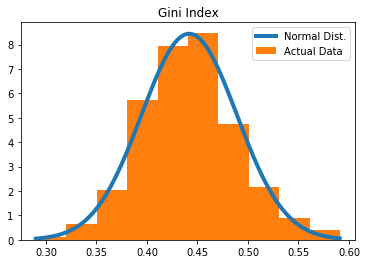

In [28]:
transform_gini = []
for i in range(len(gini)):
    #y = (gini[i]-np.mean(gini))/np.std(gini)
    #y = (gini[i]-min(gini))/(max(gini)-min(gini))
    y = gini[i]**(1/2)
    #y = math.log(gini[i])
    transform_gini.append(y)

st_gini_transform, p_gini_transform = normaltest(transform_gini)
if p_gini_transform > 0.01:
    print('The distribution of crime index for income inequality existing is approximately normal.')
else:
    print('The distribution of crime index for income inequality existing is not approximately normal.')
xs = np.arange(min(gini), max(gini), 0.001)
fit = stats.norm.pdf(xs, np.mean(gini), np.std(gini))
plt.plot(xs, fit, label = 'Normal Dist.', lw = 4)
plt.hist(gini, density = True, label = 'Actual Data');
plt.title('Gini Index')
plt.legend();

import statistics
if(statistics.median(gini) < statistics.mean(gini)):
    print('Positive Skew')
else:
    print('Negative Skew')
print(p_gini_transform)

# Data Analysis & Results

Include cells that describe the steps in your data analysis.

### Household Income and Quintile Share Analysis

Let's take a quick look at the the crime and quintile share data

In [ ]:
# Create a pair plot with income columns and crime per 100,000 based on population
sns.pairplot(crime_income_df, y_vars = ['20th', '40th', 'Median', 'quintile share'],
             x_vars = ['murdersper100k', 'rapesper100k', 'robberiesper100k', 'assaultsper100k', 'burglariesper100k', 'theftsper100k', 'autotheftsper100k', 'arsonper100k', 'crime index'])

Visually speaking, it seems very clear that poverty connects with crime. Places with wealthier 20th percentiles have low crime, and places with poorer 20th percentiles have more crime. The same is true of the median and 40th percentiles. The relationship with the Quintile Share seems a little more complicated.Recall that a higher quintile share indicates a higher level of inequality. There seems to be a soft trend where the quintile share does relate to level of crime, but it is by no means a firm one.

In [ ]:
# Get general statistics for income and crime data
(crime_income_df.describe()).round()

In [ ]:
df_crimeper100 = crime_income_df[['quintile share', 'murdersper100k', 'rapesper100k', 'robberiesper100k', 'assaultsper100k',
                            'burglariesper100k', 'theftsper100k', 'autotheftsper100k', 'arsonper100k', 'crime index']]
df_crimeper100.head()

In [ ]:
corrs_crimeper100 = df_crimeper100.corr()
corrs_crimeper100

There seems to be a fairly solid correlation here; 0.35 is certainly less correlated than some of the other values we're seeing, but it makes sense that individual types of crime per 100k would be very strongly related with the crime index, since they more or less determine it.
   We will now check crime index against different percentiles (specifically 20th, Median, and 95th) of income instead of against the quintile share. This will give us an idea of how poverty in and of itself contributes to the problem.

In [ ]:
df_20thper100 = crime_income_df[['20th', 'murdersper100k', 'rapesper100k', 'robberiesper100k', 'assaultsper100k',
                            'burglariesper100k', 'theftsper100k', 'autotheftsper100k', 'arsonper100k', 'crime index']]
corrs_20thper100 = df_20thper100.corr()
corrs_20thper100

The negative correlation between the 20th percentile of income against crimes per 100k is a lot stronger than simply against counts of crime. Aside from autothefts at correlation -0.173704, all the other crimes have a correlation between -0.45 and -0.29 with income's 20th percentile.

In [ ]:
df_Medper100 = crime_income_df[['Median', 'murdersper100k', 'rapesper100k', 'robberiesper100k', 'assaultsper100k',
                            'burglariesper100k', 'theftsper100k', 'autotheftsper100k', 'arsonper100k', 'crime index']]
corrs_Medper100 = df_Medper100.corr()
corrs_Medper100

Once again, similar to what we saw for the 20th percentile, for the Median, there is a stronger negative correlation between income and crime per 100k than between income and just counts of crime. Against crime index, the negative correlation is -0.512659.

In [ ]:
df_crimes95th = crime_income_df[['95th', 'murders', 'rapes', 'robberies', 'assaults', 'burglaries',
                            'thefts', 'autothefts', 'arson', 'crime index']]
corrs_crime95th = df_crimes95th.corr()
corrs_crime95th

In [ ]:
df_95thper100 = crime_income_df[['95th', 'murdersper100k', 'rapesper100k', 'robberiesper100k', 'assaultsper100k',
                            'burglariesper100k', 'theftsper100k', 'autotheftsper100k', 'arsonper100k', 'crime index']]
corrs_95thper100 = df_95thper100.corr()
corrs_95thper100

We see something different at the 95th percentile of income. When checking against counts of crime, there seems to be a positive correlation, although low, with rapes (0.102029), thefts (0.143141), and autothefts (0.119729) at a stronger correlation with the 95th than other crimes are.

Correlation is negative once again though when we check income's 95th percentile against the crimes per 100k in the population. Against the crime index, we have a correlation of -0.354678.

In [ ]:
# Create 'ineq_exists' column: '1' if exists, '0' if doesn't
# Income inequality defined as >= median of all income inequalities
income_ineq_median = crime_income_df["quintile share"].median()

ineq_exists = [0]*len(crime_income_df)
for i in range(0,len(crime_income_df)):
    if crime_income_df["quintile share"][i] >= income_ineq_median:
        ineq_exists[i] = 1
    else:
        ineq_exists[i] = 0
crime_income_df['inequality exists'] = ineq_exists  
crime_income_df.head()

In [ ]:
# Side-by-side histogram plots of crime index in areas with and without income inequality
fig, axes = plt.subplots(1, 2)

crime_income_df[crime_income_df["inequality exists"] == 1]["crime index"].plot.hist(ax = axes[0], title = 'Income Inequality Exists')
crime_income_df[crime_income_df["inequality exists"] == 0]["crime index"].plot.hist(ax = axes[1], title = 'Income Inequality Doesn''t Exist')

In [ ]:
crime_ineq = crime_income_df[crime_income_df["inequality exists"] == 1]["crime index"].values
crime_no_ineq = crime_income_df[crime_income_df["inequality exists"] == 0]["crime index"].values

st_ineq, p_ineq = normaltest(crime_ineq)
st_no_ineq, p_no_ineq = normaltest(crime_no_ineq)

is_n_ineq = bool(p_ineq > 0.01)
if is_n_ineq == True:
    print('The distribution of crime index for income inequality existing is approximately normal.')
else:
    print('The distribution of crime index for income inequality existing is not approximately normal.')
    
is_n_no_ineq = bool(p_no_ineq > 0.01)
if is_n_no_ineq == True:
    print('The distribution of crime index for income inequality not existing is approximately normal.')
else:
    print('The distribution of crime index for income inequality not existing is not approximately normal.')


Our data isn't normal, so it's not possible to run certain kinds of tests on it. Let's try to normalize our data really quick. We are using the normalize funtion from sklearn, and we are also doing a cuberoot transformation.

In [ ]:
crime_ineq = pd.Series(crime_ineq)

crime_no_ineq = pd.Series(crime_no_ineq)

crime_ineq =    pd.DataFrame(preprocessing.normalize([crime_ineq],norm='max'))
crime_ineq = crime_ineq.transpose()
crime_ineq = pd.DataFrame(np.cbrt(crime_ineq))

crime_no_ineq = pd.DataFrame(preprocessing.normalize([crime_no_ineq],norm='max'))
crime_no_ineq = crime_no_ineq.transpose()
crime_no_ineq = pd.DataFrame(np.cbrt(crime_no_ineq))

fig, axes = plt.subplots(1, 2)

crime_ineq.plot.hist(ax = axes[0], title = 'Income Inequality Exists')
crime_no_ineq.plot.hist(ax = axes[1], title = 'Income Inequality Doesn''t Exist')

In [ ]:
# Check for normality again
st_ineq, p_ineq = normaltest(crime_ineq)
st_no_ineq, p_no_ineq = normaltest(crime_no_ineq)

is_n_ineq = bool(p_ineq > 0.01)
if is_n_ineq == True:
    print('The distribution of crime index for income inequality existing is approximately normal.')
else:
    print('The distribution of crime index for income inequality existing is not approximately normal.')
    
is_n_no_ineq = bool(p_no_ineq > 0.01)
if is_n_no_ineq == True:
    print('The distribution of crime index for income inequality not existing is approximately normal.')
else:
    print('The distribution of crime index for income inequality not existing is not approximately normal.')
    
print(p_ineq,p_no_ineq)

Success! Now that we have approximately normal distributions, we can do some more testing.

In [ ]:
# Check for significant difference
t_val, p_val = ttest_ind(crime_ineq, crime_no_ineq)

if p_val < 0.01:
    print('There is a significant difference.')
else:
    print('There is NOT a significant difference.')


After performing a 2-sample t-test, we can conclude that there is indeed a significant difference in crime index between areas where income inequality exists and areas where income inequality doesn't exist. But maybe this effect is due to a confound, namely poverty in and of itself so we should look at poverty values.

In [ ]:
# Create 'poverty_exists' column: '1' if exists, '0' if doesn't
# poverty defined as 20th percentile income < mean of all 20th percentile incomes
mean20th = crime_income_df["20th"].mean()

pov_exists = [0]*len(crime_income_df)
for i in range(0,len(crime_income_df)):
    if crime_income_df["20th"][i] < mean20th:
        pov_exists[i] = 0
    else:
        pov_exists[i] = 1
crime_income_df['poverty exists'] = pov_exists  
crime_income_df.head()

In [ ]:
print(len(crime_income_df[crime_income_df['poverty exists'] == 0]))
print(len(crime_income_df[crime_income_df['poverty exists'] == 1]))

As we can see, based on our defintion of poverty, 561 counties do not experience poverty while 363 counties do.

Using `value_counts` from pandas, extract the number of 'poverty exists' and 'poverty doesn't exist', separately for 'income inequality exists' and 'income inequality doesn't exist'. 

To do so:

- select from `crime_income_df` income inequality, 0 and 1 separately, extract the poverty exists column, and use the `value_counts` method.
- Save the counts for each 'poverty does/doesn't exist' for 'income inequality exists' to a variable called `pov_ineq`
- Save the counts for each 'poverty does/doesn't exist' for 'income inequality doesn't exist' to a variable called `pov_no_ineq`


In [ ]:
pov_ineq = crime_income_df[crime_income_df['inequality exists'] == 1]['poverty exists'].value_counts()
pov_no_ineq = crime_income_df[crime_income_df['inequality exists'] == 0]['poverty exists'].value_counts()
print(pov_ineq)
print(pov_no_ineq)

What we saw from above is that of all the areas WITH income inequality, 409 counties do not experience poverty while 53 do. Meanwhile in all the areas WITHOUT income inequality, 310 counties DO experience poverty while 152 do not. 

Let's find the ratio of poverty existing, the proportion of counties with poverty, in 'income inequality exists' and 'income inequality doesn't exist'. This will be value between 0.0 and 1.0, calculated as #(pov == 1) / (#(pov == 0) + #(pov == 1) - done separately for income inequality existing and not existing.

We will use the `pov_ineq` and `pov_no_ineq` variables to calculate these.

Save the ratio of poverty existing in 'inequality exists' to a variable `r_ineq`.

Save the ratio of poverty existing in 'inequality doesn't exist' to a variable `r_no_ineq`.

Note: keep these numbers as ratios (they should be decimal numbers, less than 1).


In [ ]:
r_ineq = pov_ineq[1]/(pov_ineq[0] + pov_ineq[1])
r_no_ineq = pov_no_ineq[1]/(pov_no_ineq[0] + pov_no_ineq[1])

print(r_ineq)
print(r_no_ineq)

The ratio of poverty existing in the two categories appear very different, but we will use a chi-squared test to see whether the difference in poverty-ratio between 'income inequality does/doesn't exist' is significantly different.

In [ ]:
chisq, p_val_chi = stats.chisquare(np.array([pov_ineq.values, pov_no_ineq.values]), axis=None)

if p_val_chi < 0.01:
    print('There is a significant difference in ratios!')

We will now take a look at these comparisons in pivot tables. 

We'll use the pandas `pivot_table` method to create pivot table and assign it to a variable `pv`.

We'll set the values as 'crime index', and the indices as 'poverty exists' and 'inequality exists' in the pivot table.

In [ ]:
pv = pd.pivot_table(crime_income_df, values='crime index', index=['poverty exists', 'inequality exists'])

pv

Short recap:
- Our initial hypothesis suggested there is a significant difference between crime index of counties with and without income inequality. 
- However, further analyses suggested there may be a confounding variable, as there is also a significantly different poverty balance between counties with and without income inequality. 

Checking the average crime index, per 'inequality exists', split up by 'poverty exists', suggests there may not be a difference between 'inequality exists', other than what is explained by 'poverty exists'. 

Now we want to statistically ask this question: is there still a difference in crime index between 'inequality exists', when controlling for differences in 'poverty exists'? 

We will need to make some linear models, using Ordinary Least Squares (OLS).

We will do this using the method that is outlined in the 'LinearModels' Tutorial, using patsy, and statsmodels. 
- Create design matrices with `patsy.dmatrices`
- Iniliaize an OLS model with `sm.OLS`
- Fit the OLS model
- Check the summary for results. 

In [ ]:
# rename some columns so that dmatrices() function can be used in next step
crime_income_df.rename(columns={'crime index':'crimeindex',
                                   'inequality exists':'inequalityexists', 
                                   'poverty exists':'povertyexists',
                                    'quintile share':'quintileshare'}, inplace=True)
crime_income_df.head()

In [ ]:
outcome_1, predictors_1 = patsy.dmatrices('crimeindex ~ inequalityexists', crime_income_df)
mod_1 = sm.OLS(outcome_1, predictors_1)
res_1 = mod_1.fit()

print(res_1.summary())

Based on the model we ran above (using alpha value of 0.01), we will check if income inequality significantly predicts crime index.

In [ ]:
lm_1 = bool(res_1.pvalues[1] < 0.01)
if lm_1 == True:
    print("Income inequality significantly predicts crime index.")
else:
    print("Income inequality doesn't significantly predict crime index.")    

In [ ]:
outcome_2, predictors_2 = patsy.dmatrices('crimeindex ~ inequalityexists + povertyexists', crime_income_df)
mod_2 = sm.OLS(outcome_2, predictors_2)
res_2 = mod_2.fit()
print(res_2.summary())

In [ ]:
lm_2 = bool(res_1.pvalues[1] < 0.01)
if lm_1 == True:
    print("Income inequality significantly predicts crime index.")
else:
    print("Income inequality doesn't significantly predict crime index.")    

In [ ]:
ans = (lm_1 == True and lm_2 == True)
if ans == True:
    print("Counties with income inequality and counties without income inequality have a systematically different crime index.")
else:
    print("Counties with income inequality and counties without income inequality don't have a systematically different crime index.")


In [ ]:
# Linear regression using the continuous values for crime index and quintile share
outcome_3, predictors_3 = patsy.dmatrices('crimeindex ~ quintileshare', crime_income_df)
mod_3 = sm.OLS(outcome_3, predictors_3)
res_3 = mod_3.fit()
lm_3 = bool(res_3.pvalues[1] < 0.01)
if lm_3 == True:
    print("Quintile Share significantly predicts crime index.\n")
else:
    print("Quintile Share doesn't significantly predict crime index.\n") 

print(res_3.summary())

In [ ]:
# Plot the orginal data (as before)
plt.scatter(crime_income_df['quintileshare'], crime_income_df['crimeindex'], alpha=0.3, label='Data', s=100);

# Generate and plot the model fit line
xs = np.linspace(crime_income_df['quintileshare'].min(), crime_income_df['quintileshare'].max())
ys = (57.9963 * xs) - 7.3352
plt.plot(xs, ys, '--k', linewidth=4, label='Model')

plt.title('Quintile share and crime index linear regression')
plt.xlabel('quintile share')
plt.ylabel('crime index')
plt.legend();
plt.show()

In [ ]:
df_ineq_exists = pd.DataFrame(crime_income_df[crime_income_df['inequalityexists'] == 1])
df_no_ineq_exists = pd.DataFrame(crime_income_df[crime_income_df['inequalityexists'] == 0])

df_ineq_ineqcrime = df_ineq_exists[['quintileshare', 'crimeindex']]
df_no_ineq_ineqcrime = df_no_ineq_exists[['quintileshare', 'crimeindex']]

corrs_ineq_ineqcrime = df_ineq_ineqcrime.corr()
corrs_no_ineq_ineqcrime = df_no_ineq_ineqcrime.corr()

corrs_ineq_ineqcrime

In [ ]:
corrs_no_ineq_ineqcrime

There is a weak positive correlation between quintile share and crime index

### Gini Index Analysis

# Ethics & Privacy

For common problems among ethics and privacy when collecting data, many did not apply to our study, such as informed consent and collection bias, due to fact that we did not use human subjects for our projects and are using public & government datasets. However, ethical issues we may need to consider would include the disclosure of data of minors, for example the perpetrator of a juvenile crime. Perhaps we can use data where crimes of minors are included as long as identities are anonymous or unknown. At first, we considered focusing our project solely on the crimes performed by persons of legal age, thus removing information about minors from our datasets. All of the data sets we have looked at right now are public datasets, so we should be fine as far as permissions are concerned. Any identifying information have already been redacted to maintain confidentiality. If we encounter any data that seems to be a breach of confidentiality, we will follow the Safe Harbour method to remove any personally identifiable information. Using a default ethics checklist to cross-reference possible issues helped us think more abbout who will be affected by our research and what ways we can use to ensure prevention in harming others.

In terms of bias, there could be bias in the crime reporting and data that we are looking at since it is collected by humans. We also have to be aware of the bias and cultural issues around reporting certain crimes such as rape or hate crimes.

For other ethical issues to consider is honest representation of the data and consider if the data we've grabbed from public sources (Kaggle) and the government are always reliable. From checking the source on Kaggle we've implemented, there were listed sources from this scraped code. For crime, it was ICPSR of UMich, and as it is an established university, we're making the assumption that the data is reliable and permission was gathered. The other source is from the US Census Bureau, a public government source.

In terms of whether our research can indirectly harm others and serve as a source for others to profit off of, it's possible that there's always a chance to represent a source incorrectly. Our analysis results could also be used for laws and policies that negatively affect people. However, what we'll do to at least control some of this possibility is to not make outlandish claims from our data and stick with a factual conclusion truly based on what the data is showing. 

References:
- 1) Data Science Ethics Checklist: http://deon.drivendata.org/#default-checklist
- 2) Institute for Social Research: https://www.icpsr.umich.edu/icpsrweb/
- 3) U.S. Census Bureau: https://census.gov/

# Conclusion & Discussion

*Fill in your discussion information here*